# Problem 1: Data Exploration and Visualisation

1.Obtaining_Data

In [31]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [33]:
end_date = datetime(year=2025, month=3, day=31)
start_date = datetime(year=2024, month=3, day=31)

In [35]:
ticker = "RELIABLE.NS"
df = yf.download(
    tickers = ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)
df

Ticker     RELIABLE.NS                                        
Price             Open       High        Low      Close Volume
Date                                                          
2024-04-01   65.525879  65.525879  65.525879  65.525879   2400
2024-04-02   64.876122  64.876122  64.876122  64.876122   2400
2024-04-03   61.977184  61.977184  61.977184  61.977184   4800
2024-04-04   58.978290  64.976082  58.978290  64.976082   4800
2024-04-05   64.976082  64.976082  64.976082  64.976082      0
...                ...        ...        ...        ...    ...
2025-03-24   79.900002  80.199997  78.199997  79.220001  13278
2025-03-25   80.900002  81.000000  78.000000  79.410004  38775
2025-03-26   76.709999  79.150002  74.000000  76.120003  18390
2025-03-27   75.000000  75.070000  67.160004  68.050003  48056
2025-03-28   68.949997  72.000000  68.949997  70.730003  31507

[248 rows x 5 columns]

In [37]:
#cleaning and inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2024-04-01 to 2025-03-28
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (RELIABLE.NS, Open)    248 non-null    float64
 1   (RELIABLE.NS, High)    248 non-null    float64
 2   (RELIABLE.NS, Low)     248 non-null    float64
 3   (RELIABLE.NS, Close)   248 non-null    float64
 4   (RELIABLE.NS, Volume)  248 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.6 KB


No missing values

In [40]:
print(df.index)

DatetimeIndex(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
               '2024-04-05', '2024-04-08', '2024-04-09', '2024-04-10',
               '2024-04-12', '2024-04-15',
               ...
               '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20',
               '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26',
               '2025-03-27', '2025-03-28'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)


Indexing is datetime.

2.Visual Insights

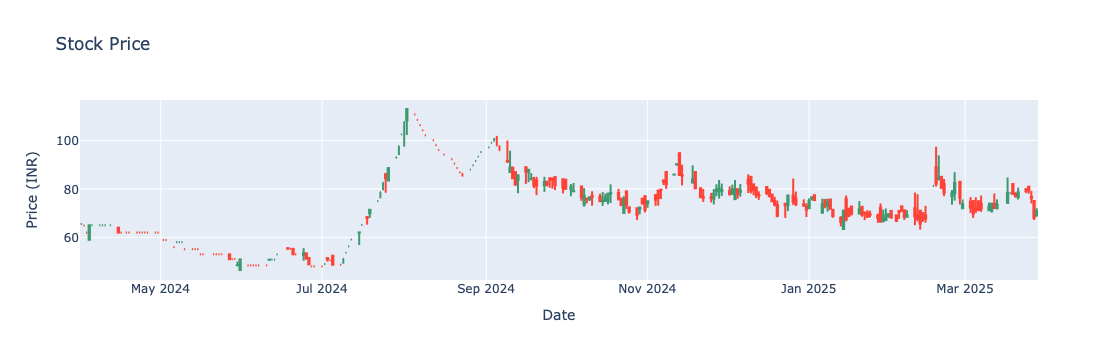

In [44]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df[('RELIABLE.NS', 'Open')],
    high=df[('RELIABLE.NS', 'High')],
    low=df[('RELIABLE.NS', 'Low')],
    close=df[('RELIABLE.NS', 'Close')]
)])

fig.update_layout(
    title='Stock Price',
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    xaxis_rangeslider_visible=False
)
fig.show()


PATTERN 1

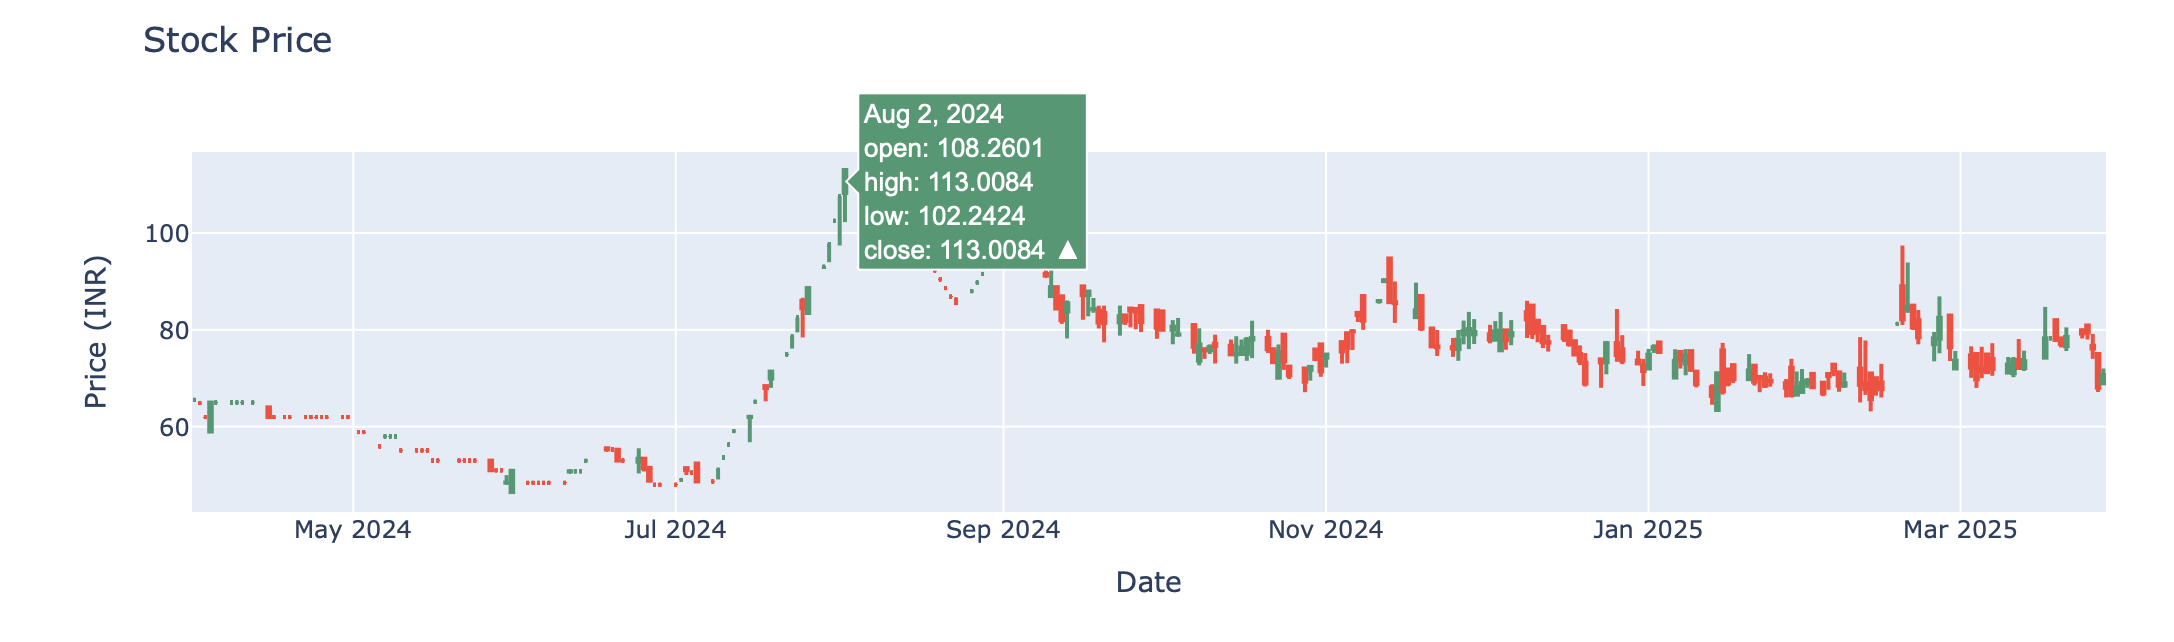


Here there is a trend reversal, the stocks were continuously growing from July 10, 2024 (INR 53.63026) to August 2, 2024(INR 113.0084), but 
after this their value starts to fall down and keeps declining till August 23, 2024(INR 86.26824). 
Reason:(source:google) The July jobs report showed fewer jobs and a small rise in unemployment, which made people worry that a recession might happen.
In early August, global markets experienced a sharp decline, partly due to concerns about a slowing US economy and potential recession.

PATTERN 2

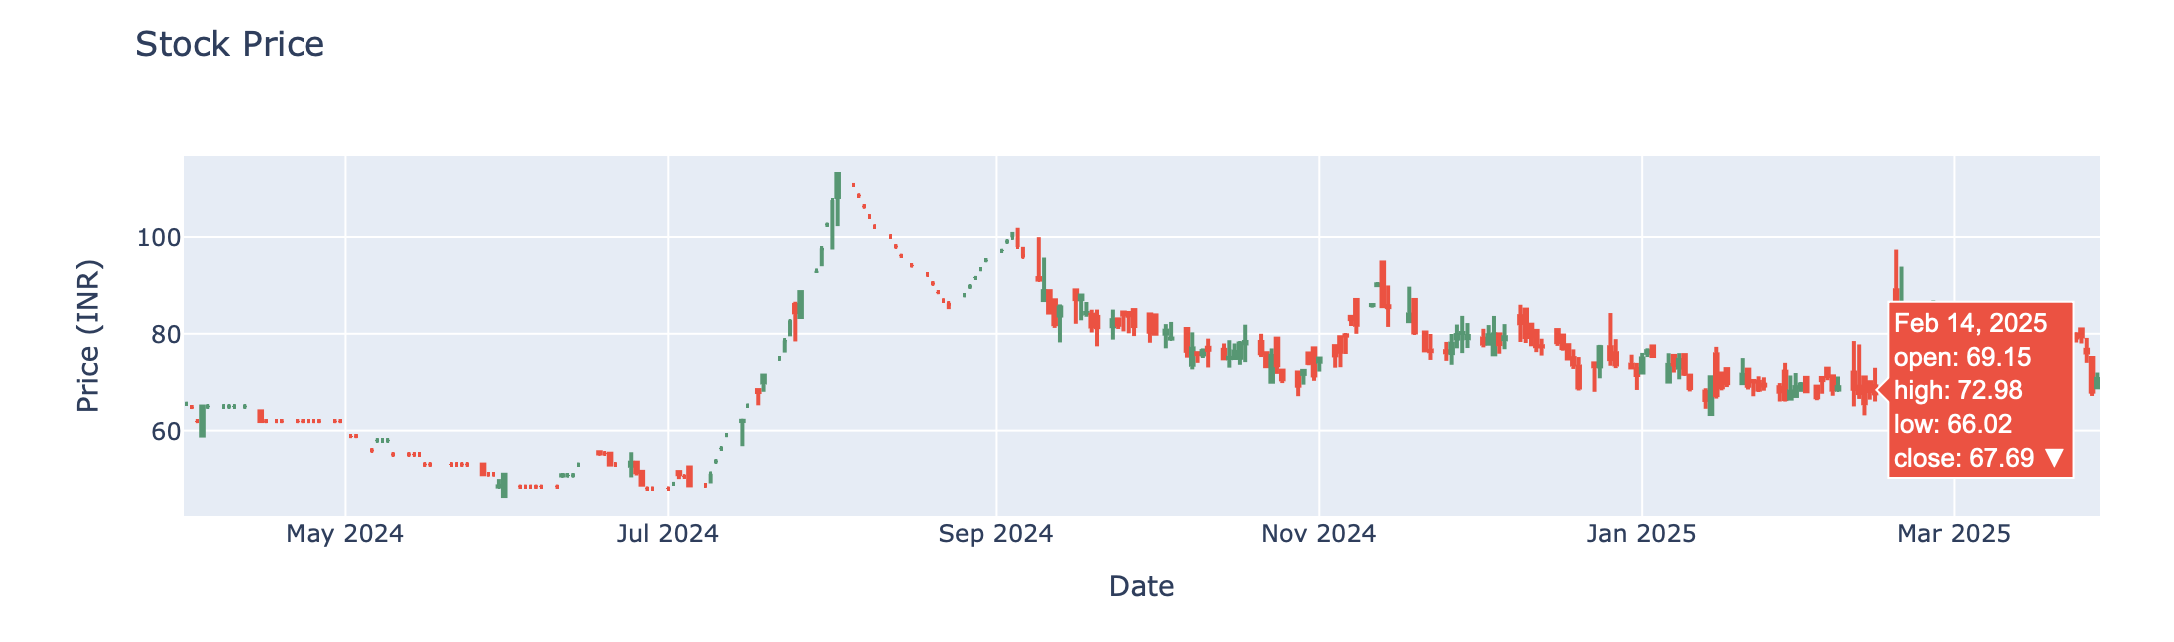

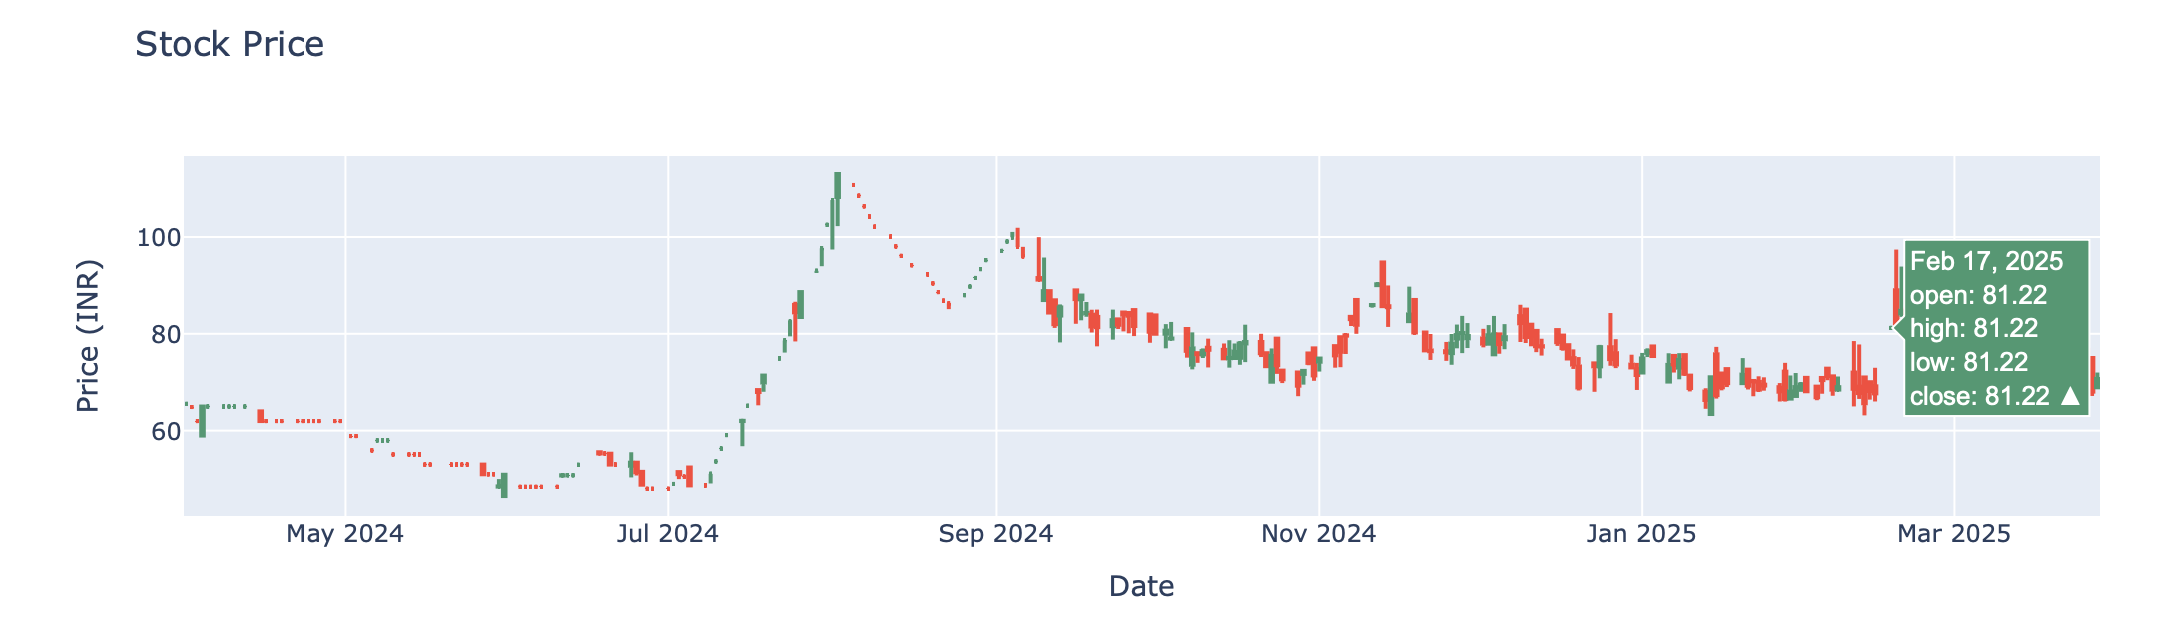

There is a significant price jump from ₹67.69 on February 14, 2024, to ₹81.22 on February 17, 2024, after a 3-day gap.
Reason:(Resou On February 14, 2024, U.S. stock markets experienced a rebound following a sell-off triggered by a hotter-than-expected inflation report.
The S&P 500 rose 1%, and the Nasdaq Composite gained 1.3%, indicating a recovery in investor sentiment .

In [ ]:
# Problem 2

In [46]:
#1.Return Computation
#Simple Return
import numpy as np
df['Simple Return'] = df['RELIABLE.NS', 'Close'].pct_change() 
#Log return
df['Log Return'] = np.log(df['RELIABLE.NS', 'Close'] / df['RELIABLE.NS', 'Close'].shift(1))
print(df[['Simple Return', 'Log Return']].dropna().head())

Ticker     Simple Return Log Return
Price                              
Date                               
2024-04-02     -0.009916  -0.009966
2024-04-03     -0.044684  -0.045713
2024-04-04      0.048387   0.047253
2024-04-05      0.000000   0.000000
2024-04-08      0.000000   0.000000


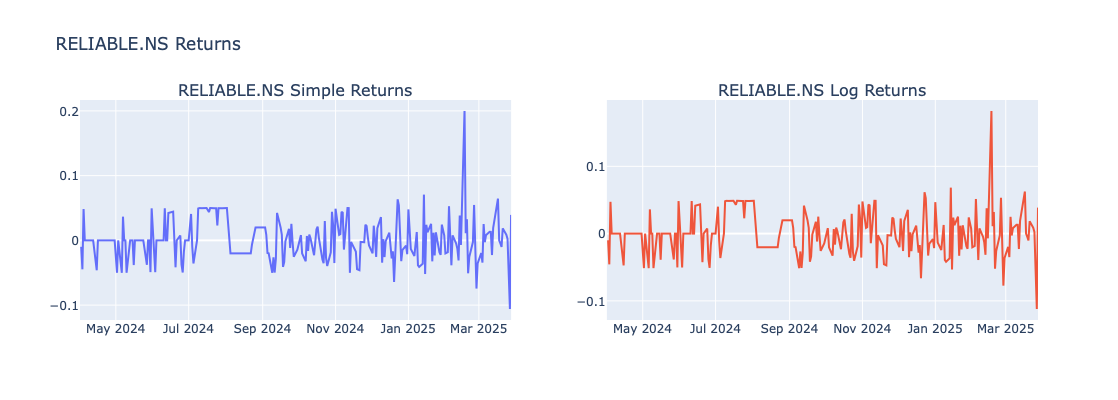

In [22]:
#Plotting the returns side by side
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
fig = make_subplots(rows=1, cols=2, subplot_titles=[f"{ticker} Simple Returns", f"{ticker} Log Returns"])
#Simple Return
fig.add_trace(
    go.Scatter(x=df.index, y=df['Simple Return_'], mode='lines', name='Simple Return'),
    row=1, col=1
)

# Log Return
fig.add_trace(
    go.Scatter(x=df.index, y=df['Log Return_'], mode='lines', name='Log Return'),
    row=1, col=2
)

fig.update_layout(
    title_text=f"{ticker} Returns",
    showlegend=False,
    height=400,
    width=1000,
)

fig.show()

Why do they look similar?
Simple Return = [P(t)/P(t-1) - 1]
Log Return = log[P(t)/P(t-1)]
First order Taylor approximation : ln(1+x) ≈ x, when x≈0
for small changes in price (which is most likely to occur in stable markets), the two returns are mathematically close to each other, that's why the two plots are similar to each other. 
They will differ significantly when the price changes become high during a makret crash.

Simple and log returns
Simple return measures the absolute change in the value of a share ignoring the compounding aspect of returns over time. 
Simple returns should be used for analyzing short-term investment performance, dealing with small changes in asset prices and communicating financial data to a general audience.
Whereas Log return calculates the rate of return on an investment, Log returns are best for longer-term analysis,
statistical models, and scenarios where compounding effects need to be properly handled.


In [48]:
#2.Volatility estimation
df['Rolling Volatility (14d)'] = df['Log Return'].rolling(window=14).std()
print(df['Rolling Volatility (14d)'])


Date
2024-04-01         NaN
2024-04-02         NaN
2024-04-03         NaN
2024-04-04         NaN
2024-04-05         NaN
                ...   
2025-03-24    0.023180
2025-03-25    0.019953
2025-03-26    0.023649
2025-03-27    0.039173
2025-03-28    0.040678
Name: Rolling Volatility (14d), Length: 248, dtype: float64


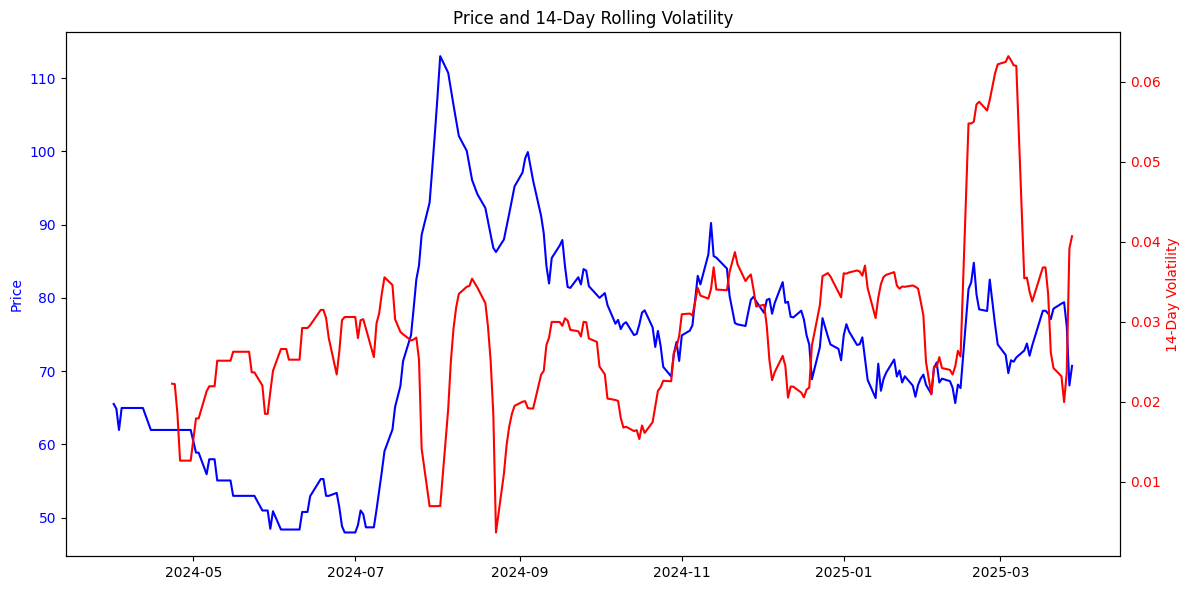

In [54]:
#plotting along with price
close=df[('RELIABLE.NS' ,'Close')]
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df.index, close, color='blue', label='Price')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df.index, df['Rolling Volatility (14d)'], color='red', label='14d Volatility')
ax2.set_ylabel('14-Day Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Price and 14-Day Rolling Volatility')
fig.tight_layout()
plt.show()

In [ ]:
#Problem 3

In [58]:
#classifying up or down
df['Direction'] = df['Simple Return'].apply(lambda x: 'UP' if x > 0 else 'DOWN')
total_days = df['Direction'].count()
up_days = (df['Direction'] == 'UP').sum()

p_up = up_days / total_days
print(f"P(UP) = {p_up:.4f} ({up_days} UP days out of {total_days})")




P(UP) = 0.4032 (100 UP days out of 248)


In [60]:
#Part 1
from scipy.stats import binom
#calculating binomial probability of exactly 6 up days in 10 days
binom.pmf(k=6, n=10, p=0.6)

np.float64(0.2508226559999999)

The probability of exactly 6 UP days in 10 days is 0.2508

In [63]:
#calculating binomial probability of at least 8 up days in 10 days
binom.sf(7, n=10, p=0.6)

np.float64(0.16728975359999992)

The probability of atleast 8 UP days in 10 days is 0.1672

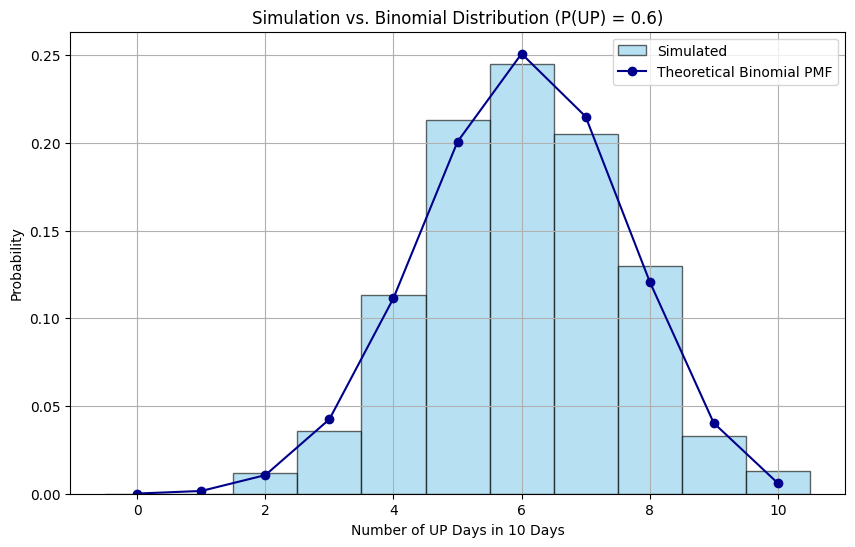

In [66]:
#Simulation 1000 times with a coin
p_up=0.6
coins=10
sim=1000
simulations = np.random.binomial(n=1, p=p_up, size=(sim, coins))
countup = simulations.sum(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(countup, bins=np.arange(-0.5, 11.5, 1), density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated')
x = np.arange(0, 11)
pmf = binom.pmf(x, n=coins, p=p_up)
plt.plot(x, pmf, 'o-', color='darkblue', label='Theoretical Binomial PMF')
plt.xlabel('Number of UP Days in 10 Days')
plt.ylabel('Probability')
plt.title('Simulation vs. Binomial Distribution (P(UP) = 0.6)')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
#Part 2: The Paradox
#Yes, it is possible to lose money even with 6 UP days out of 10, because not just number of UP days matter, the size of returns also matter.
#Classifying days for Log Return because we can't directly add daily simple returns to get a multi-day return.
df['Direction'] = np.where(df['Log Return'] > 0, 'UP', 'DOWN')
avg_up = df[df['Direction'] == 'UP']['Log Return'].mean()
avg_down = df[df['Direction'] == 'DOWN']['Log Return'].mean()

print(f"Avg Log Return on UP days: {avg_up}")
print(f"Avg Log Return on DOWN days: {avg_down}")


Avg Log Return on UP days: 0.029813736678066284
Avg Log Return on DOWN days: -0.019761557630703756


In [72]:
#6 UP days out of 10
total_log_return = 6 * avg_up + 4 * avg_down
print(total_log_return)
total_return = np.exp(total_log_return) - 1
print(f"Total 10-day return: {total_return:.2%}")


0.0998361895455827
Total 10-day return: 10.50%


In this case , we're getting a positive return, but if the avg_down is large in magnitude then it can cancel out the gain and hence we would be getting a negative return.

Part 3
Explaination: Net Return = (Win_amount * P(UP))- (Lose_amount * P(DOWN))
The Net Return should be positive in order to make profit.
P(DOWN)= 1-P(UP)
Net Return = (100 * P(UP))-(150 * (1-P(UP)) = 250 * P(UP) -150.
Hence, for Net Return>0, P(UP)>0.6
In the case of my stock, P(UP) = 0.4032, which is less than 0.6, therefore I would not take the bet.